In [1]:
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, r2_score, mean_squared_error

import tensorflow as tf  
from keras import Sequential
from keras.layers import Dropout, Add, Dense, BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img
from keras.callbacks import ModelCheckpoint, EarlyStopping
import cv2
from collections import Counter


In [3]:
Age=[]
Gender=[]
Race=[]
images_data=[]
#download images and put in a suitable directory
#link: https://www.kaggle.com/datasets/muhammadardiputra/utkface-dataset
directory='UTKFace/'
for file in os.listdir(directory):
    filename=directory+file
    #load images in single color mode
    X=load_img(filename, color_mode="grayscale")
    #resize images
    X_resized=X.resize((32, 32),resample=Image.LANCZOS)
    X_flatten=array(X_resized).flatten()
    X_flatten_reshaped = X_flatten.reshape(32,32,1).astype('float32') 
    #normalization
    X_flatten_reshaped_normalized=X_flatten_reshaped/255
    images_data.append(X_flatten_reshaped_normalized)
    imagfilename=file.split('_')
    Age.append(imagfilename[0])
    Gender.append(imagfilename[1])
    Race.append(imagfilename[2])

In [4]:
print(Counter(Age))
print(Counter(Gender))
print(Counter(Race))

Counter({'26': 2197, '1': 1123, '28': 918, '35': 880, '24': 859, '25': 734, '30': 724, '32': 664, '27': 615, '29': 570, '40': 526, '36': 483, '2': 482, '45': 440, '23': 426, '34': 409, '22': 395, '50': 381, '54': 353, '31': 350, '21': 346, '38': 325, '37': 293, '60': 293, '3': 289, '20': 284, '4': 273, '58': 271, '55': 268, '42': 266, '39': 265, '8': 263, '18': 262, '65': 259, '16': 247, '53': 241, '56': 236, '52': 232, '5': 196, '15': 177, '47': 170, '9': 166, '61': 159, '17': 158, '14': 157, '43': 157, '10': 156, '85': 155, '46': 153, '48': 153, '49': 148, '75': 148, '70': 147, '33': 143, '7': 139, '51': 138, '80': 133, '41': 132, '6': 131, '12': 130, '62': 125, '63': 103, '44': 100, '68': 100, '19': 98, '72': 98, '57': 97, '67': 94, '59': 82, '90': 82, '13': 81, '66': 77, '78': 69, '11': 65, '73': 63, '76': 58, '69': 56, '64': 50, '82': 40, '86': 35, '88': 34, '71': 33, '89': 33, '74': 32, '77': 28, '84': 24, '79': 23, '81': 22, '83': 18, '96': 17, '92': 13, '100': 11, '87': 10, '95

In [5]:
age=np.array(Age).astype('float32')
gender=np.array(Gender).astype('float32')
race=np.array(Race).astype('float32')
images_data=np.array(images_data)

In [6]:
images_data.shape

(23705, 32, 32, 1)

In [7]:
#gender model creation
gender_model=Sequential()

gender_model.add(Conv2D(32, (3, 3), input_shape=(32,32,1), activation='relu', padding='same'))
gender_model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
gender_model.add(BatchNormalization())
gender_model.add(MaxPooling2D(2, 2))
gender_model.add(Dropout(0.3))

gender_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
gender_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
gender_model.add(BatchNormalization())
gender_model.add(MaxPooling2D(2, 2))
gender_model.add(Dropout(0.3))

gender_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
gender_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
gender_model.add(BatchNormalization())
gender_model.add(MaxPooling2D(2, 2))
gender_model.add(Dropout(0.3))

gender_model.add(Flatten())
gender_model.add(Dropout(0.3))
gender_model.add(Dense(64, activation='relu'))
gender_model.add(Dropout(0.3))
gender_model.add(Dense(1, activation='sigmoid'))
gender_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [8]:
#age model creation
age_model=Sequential()

age_model.add(Conv2D(32, (3, 3), input_shape=(32,32,1), activation='relu', padding='same'))
age_model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
age_model.add(BatchNormalization())
age_model.add(MaxPooling2D(2, 2))
age_model.add(Dropout(0.3))

age_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
age_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
age_model.add(BatchNormalization())
age_model.add(MaxPooling2D(2, 2))
age_model.add(Dropout(0.3))

age_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
age_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
age_model.add(BatchNormalization())
age_model.add(MaxPooling2D(2, 2))
age_model.add(Dropout(0.3))

age_model.add(Flatten())
age_model.add(Dropout(0.3))
age_model.add(Dense(64, activation='relu'))
age_model.add(Dropout(0.3))
age_model.add(Dense(1,activation="relu"))
age_model.compile(loss='mean_absolute_error', optimizer='adam')

In [9]:
#race model creation
race_model=Sequential()

race_model.add(Conv2D(32, (3, 3), input_shape=(32,32,1), activation='relu', padding='same'))
race_model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
race_model.add(BatchNormalization())
race_model.add(MaxPooling2D(2, 2))
race_model.add(Dropout(0.3))

race_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
race_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
race_model.add(BatchNormalization())
race_model.add(MaxPooling2D(2, 2))
race_model.add(Dropout(0.3))

race_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
race_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
race_model.add(BatchNormalization())
race_model.add(MaxPooling2D(2, 2))
race_model.add(Dropout(0.3))

race_model.add(Flatten())
race_model.add(Dropout(0.3))
race_model.add(Dense(64, activation='relu'))
race_model.add(Dropout(0.3))
race_model.add(Dense(5, activation='softmax'))
race_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
#split dataset into training and testing set
X_train_gender, X_test_gender, Y_train_gender, Y_test_gender=train_test_split(images_data, gender, test_size=0.25)
X_train_age, X_test_age, Y_train_age, Y_test_age=train_test_split(images_data, age, test_size=0.25)
X_train_race,  X_test_race, Y_train_race, Y_test_race=train_test_split(images_data, race, test_size=0.25)

In [23]:
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator_gender = data_generator.flow(X_train_gender, Y_train_gender, 32)
train_generator_age = data_generator.flow(X_train_age, Y_train_age, 32)
train_generator_race = data_generator.flow(X_train_race, Y_train_race, 32)

In [24]:
#model training
early_stopping=EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
model_checkpoint_gender=ModelCheckpoint('gender-{epoch:02d}-{val_loss:.2f}.hdf5', save_best_only=True, monitor='val_loss', mode='min')
model_checkpoint_age=ModelCheckpoint('age-{epoch:02d}-{val_loss:.2f}.hdf5', save_best_only=True, monitor='val_loss', mode='min')
model_checkpoint_race=ModelCheckpoint('race-{epoch:02d}-{val_loss:.2f}.hdf5', save_best_only=True, monitor='val_loss', mode='min')


Training Gender Model

In [13]:
gender_history=gender_model.fit(train_generator_gender, epochs=50, validation_data=(X_test_gender,Y_test_gender), callbacks=[early_stopping, model_checkpoint_gender])

Epoch 1/50
556/556 [==============================] - 51s 90ms/step - loss: 0.6068 - accuracy: 0.6821 - val_loss: 0.4588 - val_accuracy: 0.7802
Epoch 2/50
556/556 [==============================] - 54s 97ms/step - loss: 0.4648 - accuracy: 0.7864 - val_loss: 0.4517 - val_accuracy: 0.7803
Epoch 3/50
556/556 [==============================] - 57s 102ms/step - loss: 0.4265 - accuracy: 0.8035 - val_loss: 0.3758 - val_accuracy: 0.8232
Epoch 4/50
556/556 [==============================] - 57s 103ms/step - loss: 0.3961 - accuracy: 0.8222 - val_loss: 0.3766 - val_accuracy: 0.8313
Epoch 5/50
556/556 [==============================] - 59s 106ms/step - loss: 0.3891 - accuracy: 0.8273 - val_loss: 0.3412 - val_accuracy: 0.8458
Epoch 6/50
556/556 [==============================] - 59s 107ms/step - loss: 0.3666 - accuracy: 0.8350 - val_loss: 0.3260 - val_accuracy: 0.8522
Epoch 7/50
556/556 [==============================] - 69s 124ms/step - loss: 0.3626 - accuracy: 0.8370 - val_loss: 0.3364 - val_accu

In [15]:
gender_model.evaluate(X_test_gender, Y_test_gender)

186/186 [==============================] - 9s 49ms/step - loss: 0.2380 - accuracy: 0.9008


[0.23796844482421875, 0.9007929563522339]

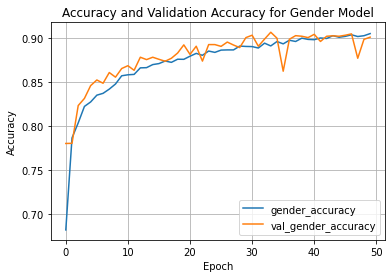

In [16]:
fig = plt.figure()
plt.plot(gender_history.history['accuracy'], label='gender_accuracy')
plt.plot(gender_history.history['val_accuracy'], label='val_gender_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.title('Accuracy and Validation Accuracy for Gender Model')
plt.show()

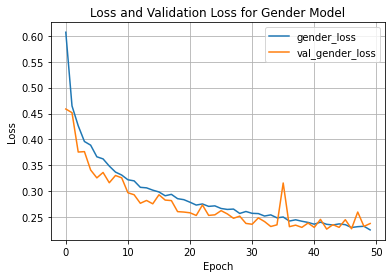

In [17]:
fig = plt.figure()
plt.plot(gender_history.history['loss'], label='gender_loss')
plt.plot(gender_history.history['val_loss'], label='val_gender_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title('Loss and Validation Loss for Gender Model')
plt.show()

Training Age Model

In [25]:
age_history=age_model.fit(train_generator_age, epochs=50, validation_data=(X_test_age,Y_test_age), callbacks=[early_stopping, model_checkpoint_age])

Epoch 1/50
556/556 [==============================] - 81s 145ms/step - loss: 7.8884 - val_loss: 6.7533
Epoch 2/50
556/556 [==============================] - 117s 210ms/step - loss: 7.9362 - val_loss: 6.4953
Epoch 3/50
556/556 [==============================] - 150s 270ms/step - loss: 7.8765 - val_loss: 10.5482
Epoch 4/50
556/556 [==============================] - 189s 339ms/step - loss: 7.8042 - val_loss: 7.4132
Epoch 5/50
556/556 [==============================] - 200s 359ms/step - loss: 7.7969 - val_loss: 7.5352
Epoch 6/50
556/556 [==============================] - 154s 278ms/step - loss: 7.6680 - val_loss: 6.4213
Epoch 7/50
556/556 [==============================] - 179s 321ms/step - loss: 7.7193 - val_loss: 6.9991
Epoch 8/50
556/556 [==============================] - 178s 320ms/step - loss: 7.7196 - val_loss: 6.5513
Epoch 9/50
556/556 [==============================] - 141s 254ms/step - loss: 7.6446 - val_loss: 6.7469
Epoch 10/50
556/556 [==============================] - 130s 233m

In [26]:
age_model.evaluate(X_test_age, Y_test_age)

186/186 [==============================] - 11s 58ms/step - loss: 6.6145


6.614524841308594

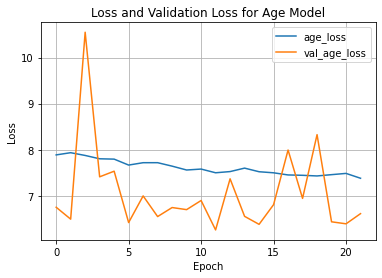

In [27]:
fig = plt.figure()
plt.plot(age_history.history['loss'], label='age_loss')
plt.plot(age_history.history['val_loss'], label='val_age_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title('Loss and Validation Loss for Age Model')
plt.show()

Training Race Model

In [28]:
race_history=race_model.fit(train_generator_race, epochs=50, validation_data=(X_test_race,Y_test_race), callbacks=[early_stopping, model_checkpoint_race])

Epoch 1/50
556/556 [==============================] - 148s 260ms/step - loss: 1.4287 - accuracy: 0.4547 - val_loss: 1.3056 - val_accuracy: 0.4866
Epoch 2/50
556/556 [==============================] - 108s 195ms/step - loss: 1.2848 - accuracy: 0.4984 - val_loss: 1.1305 - val_accuracy: 0.5688
Epoch 3/50
556/556 [==============================] - 116s 209ms/step - loss: 1.1597 - accuracy: 0.5556 - val_loss: 1.0444 - val_accuracy: 0.6163
Epoch 4/50
556/556 [==============================] - 110s 198ms/step - loss: 1.0920 - accuracy: 0.5915 - val_loss: 0.9959 - val_accuracy: 0.6379
Epoch 5/50
556/556 [==============================] - 113s 202ms/step - loss: 1.0340 - accuracy: 0.6231 - val_loss: 0.8696 - val_accuracy: 0.6938
Epoch 6/50
556/556 [==============================] - 113s 202ms/step - loss: 0.9980 - accuracy: 0.6415 - val_loss: 0.9350 - val_accuracy: 0.6580
Epoch 7/50
556/556 [==============================] - 112s 202ms/step - loss: 0.9716 - accuracy: 0.6497 - val_loss: 0.9094 -

In [30]:
race_model.evaluate(X_test_race, Y_test_race)

186/186 [==============================] - 8s 41ms/step - loss: 0.6413 - accuracy: 0.7840


[0.641258180141449, 0.7840391397476196]

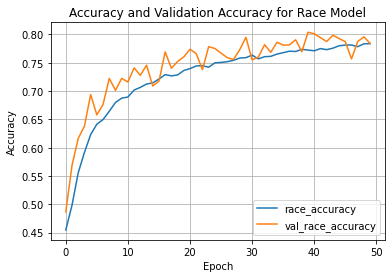

In [31]:
fig = plt.figure()
plt.plot(race_history.history['accuracy'], label='race_accuracy')
plt.plot(race_history.history['val_accuracy'], label='val_race_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.title('Accuracy and Validation Accuracy for Race Model')
plt.show()

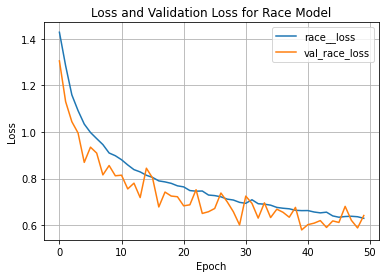

In [32]:
fig = plt.figure()
plt.plot(race_history.history['loss'], label='race__loss')
plt.plot(race_history.history['val_loss'], label='val_race_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title('Loss and Validation Loss for Race Model')
plt.show()

### Model Evaluation

a) Gender

In [34]:
gender_pred=np.round(gender_model.predict([X_test_gender]))

186/186 [==============================] - 4s 19ms/step


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

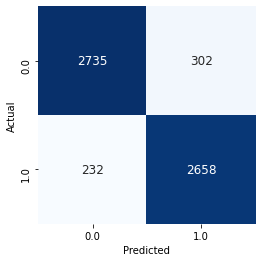

In [35]:
#confusion matrix
cm=confusion_matrix(Y_test_gender, gender_pred)
df_cm = pd.DataFrame(cm, columns=np.unique(Y_test_gender), index = np.unique(Y_test_gender))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, annot=True,annot_kws={"size": 12}, cbar=False,square=True, fmt="d", cmap="Blues")

In [36]:
#classification report
print(classification_report(Y_test_gender, gender_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91      3037
         1.0       0.90      0.92      0.91      2890

    accuracy                           0.91      5927
   macro avg       0.91      0.91      0.91      5927
weighted avg       0.91      0.91      0.91      5927



b) Age

In [37]:
age_pred=age_model.predict(X_test_age).flatten()

186/186 [==============================] - 4s 19ms/step


In [38]:
age_pred

array([38.72209  ,  6.9268136, 45.424038 , ..., 36.961365 , 33.52786  ,
       31.615093 ], dtype=float32)

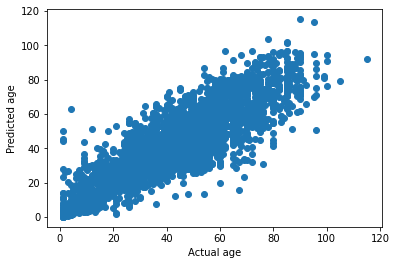

In [39]:
fig = plt.figure()
plt.scatter(Y_test_age, age_pred)
plt.xlabel('Actual age')
plt.ylabel('Predicted age')
plt.show()

In [40]:
r2_scores=r2_score(Y_test_age, age_pred)
rmse_scores=mean_squared_error(Y_test_age, age_pred)**0.5
print('R-saqured: ', r2_scores)
print('RMSE: ', rmse_scores)

R-saqured:  0.797261616637166
RMSE:  8.96558752361242


c) Race

In [44]:
race_pred=np.argmax(race_model.predict([X_test_race]),axis=1)

186/186 [==============================] - 4s 19ms/step


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

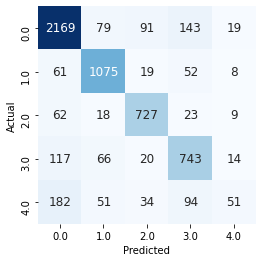

In [45]:
#confusion matrix
cm=confusion_matrix(Y_test_race, race_pred)
df_cm = pd.DataFrame(cm, columns=np.unique(Y_test_race), index = np.unique(Y_test_race))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, annot=True,annot_kws={"size": 12}, cbar=False,square=True, fmt="d", cmap="Blues")

In [46]:
#classification report
print(classification_report(Y_test_race, race_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.87      0.85      2501
         1.0       0.83      0.88      0.86      1215
         2.0       0.82      0.87      0.84       839
         3.0       0.70      0.77      0.74       960
         4.0       0.50      0.12      0.20       412

    accuracy                           0.80      5927
   macro avg       0.74      0.70      0.70      5927
weighted avg       0.79      0.80      0.79      5927

